/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals HI Mass:  [8.946094 9.20308  8.817502 ...     -inf     -inf     -inf]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals HI Mass:  [8.862417  9.8653965 8.722583  ...      -inf      -inf      -inf]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals HI Mass:  [ 9.767672 10.10871   8.077734 ...      -inf      -inf      -inf]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals HI Mass:  [8.021862 9.870968 8.026793 ...     -inf     -inf     -inf]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals HI Mass:  [9.626344  8.46792   7.5924773 ...      -inf      -inf      -inf]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals HI Mass:  [8.620877  7.9230638 9.368519  ...      -inf      -inf      -inf]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals HI Mass:  [7.334542  9.242793  7.9578185 ...      -inf      -inf      -inf]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10


gals HI Mass:  [7.562724 6.929905 6.551321 ...     -inf     -inf     -inf]


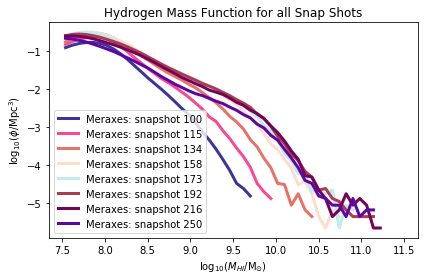

In [13]:
"""Plots for Hydrogen Mass function for all Snaps"""

# import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt # plotting library
from dragons import meraxes, munge# DRAGONS modules for reading and dealing with model ouput

fname_in = "imapping_testrun/meraxes.hdf5" # Get the file name for the meraxes file we are using
h = meraxes.set_little_h(0.7)# By specifying Hubble parameter: h=0.7, we are ensuring that all of the galaxy properties

# Read in all the snap shots using the function 'read snaplist'. Little h previously set as 0.7
snaplist = meraxes.io.read_snaplist(fname_in, h)
snaps = snaplist[0]
redshifts=snaplist[1]
lt_times=snaplist[2]
'''# Print the values if you want to see
print ('snaps: ', snaps)
print('redshifts: ', redshifts)
print('light travel time: ', lt_times)'''

# Create a new figure (with 1 column and 1 row) and axis
fig, ax = plt.subplots(1, 1)
plt.title("Hydrogen Mass Function for all Snap Shots")

# for each snapshot...
for i in snaps:

    gals, sim_props = meraxes.read_gals(fname_in, i, sim_props=True) #read in galaxies
    
    # You can also see the units of all galaxy properties (and grids properties if
    # they are present).  Here I am only printing the galaxy properties.
    '''
    units = meraxes.read_units(fname_in)
    print('\nunits\n=====')
    for k, v in units.items():
        if not isinstance(v, dict):
            print(k, ':', v.decode('utf-8'))
    print()
    '''
    
    # The units of HI Mass ouput by the model are 1e10 Msol.  Let's convert
    # this to log10(M/Msol).
    gals["HIMass"] = np.log10(gals["HIMass"]*1e10)
    print('gals HI Mass: ', gals["HIMass"])

    # The `munge` module has a nice function that will calculate the HIMass
    # for us.  Take a look at the source code for this function if you are
    # interested to see how it does this (recommended).
    # HImf = "HIMass"
    HImf = munge.mass_function(gals["HIMass"], sim_props["Volume"], bins=50,
                             range=(7.5, 11.5))

    # Plot the HI mass function
    snap_number = str(i)
    plot_number = ('plot_' + snap_number)
    #print(plot_number)
    
    ax.plot(HImf[:, 0], np.log10(HImf[:, 1]), color=np.random.rand(3,), lw=3,
            label=("Meraxes: snapshot " + snap_number))

    # Set the axis labels.
    # Note the use of LaTeX here.
    ax.set_xlabel(r"$\log_{10}(M_{HI} / {\rm M_{\odot}})$")
    ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^3})$")

    # Add the legend
    ax.legend(loc="lower left")
    # Finally save the figure as a PDF
    plt.tight_layout()
    name_of_plot=("HIMassFunction_" + snap_number)
    plt.savefig("plots/" + name_of_plot + ".pdf")



units
=====
BHemissivity : 1e60 photons
BaryonFracModifier : None
BlackHoleAccretedColdMass : 1e10 solMass
BlackHoleAccretedHotMass : 1e10 solMass
BlackHoleMass : 1e10 solMass
CentralGal : None
ColdGas : 1e10 solMass
Cos_Inc : None
DiskScaleLength : Mpc
EffectiveBHM : 1e10 solMass
EjectedGas : 1e10 solMass
FOFMvir : 1e10 solMass
FOFMvirModifier : None
Fesc : None
FescBH : None
FescWeightedGSM : 1e10 solMass
GhostFlag : None
GrossStellarMass : 1e10 solMass
H2Frac : None
H2Mass : 1e10 solMass
HIMass : 1e10 solMass
HaloID : None
HotGas : 1e10 solMass
ID : None
Len : None
MWMSA : Myr
MaxLen : None
Mcool : 1e10 solMass
MergTime : Myr
MergerBurstMass : 1e10 solMass
MergerStartRadius : Mpc
MetalsColdGas : 1e10 solMass
MetalsEjectedGas : 1e10 solMass
MetalsHotGas : 1e10 solMass
MetalsStellarMass : 1e10 solMass
Mvir : 1e10 solMass
MvirCrit : 1e10 solMass
NewStars : 1e10 solMass
Pos : Mpc
Rcool : Mpc
Rvir : Mpc
Sfr : solMass/yr
Spin : None
StellarMass : 1e10 solMass
Type : None
Vel : km/s
Vmax 

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


<Figure size 432x288 with 0 Axes>